In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importing the important libraries

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, Activation, MaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load & Preprocess the datasets

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [5]:
print(X_train.shape, X_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [8]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

# Visualize the Data

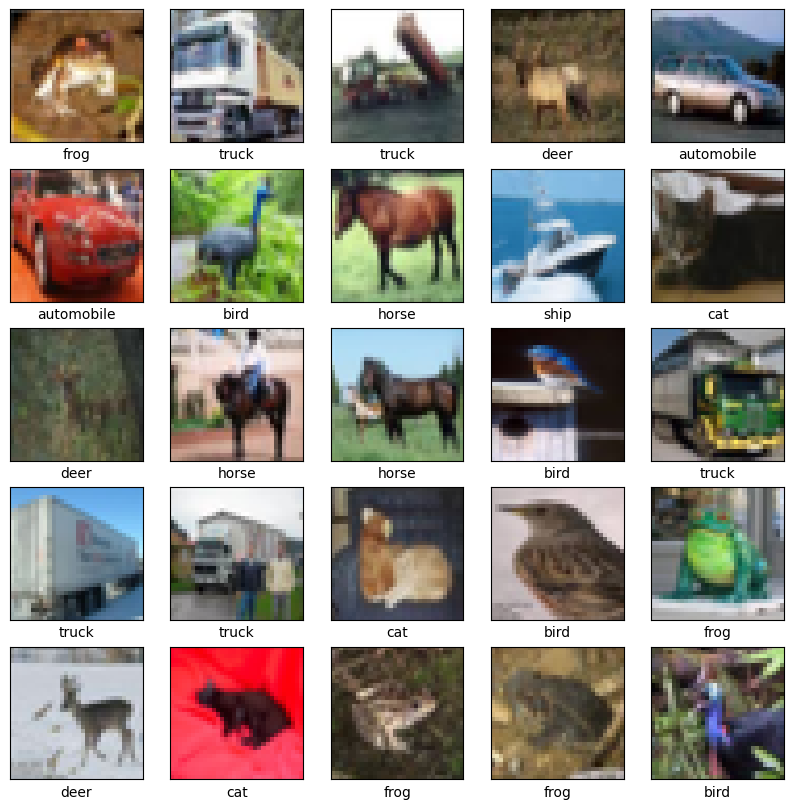

In [9]:
class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_name[int(y_train[i].argmax())])
plt.show()

# CNN Architecture

In [38]:
def cifar_model(input_shape):
    input_layer = Input(shape=input_shape)
    layer1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
    layer1 = BatchNormalization()(layer1)
    layer1 = Conv2D(32, (3, 3), activation='relu', padding='same')(layer1)
    layer1 = BatchNormalization()(layer1)
    layer1 = MaxPooling2D((2, 2))(layer1)
    
    layer2 = Conv2D(64, (3, 3), activation='relu', padding='same')(layer1)
    layer2 = BatchNormalization()(layer2)
    layer2 = Conv2D(64, (3, 3), activation='relu', padding='same')(layer2)
    layer2 = BatchNormalization()(layer2)
    layer2 = MaxPooling2D((2, 2))(layer2)

    layer3 = Conv2D(128, (3, 3), activation='relu', padding='same')(layer2)
    layer3 = BatchNormalization()(layer3)
    layer3 = Conv2D(128, (3, 3), activation='relu', padding='same')(layer3)
    layer3 = BatchNormalization()(layer3)
    layer3 = MaxPooling2D((2, 2))(layer3)

    x = Flatten()(layer3)
    x = Dropout(0.3)(x)
    
    # Hidden layer
    hidden_layer = Dense(1024, activation='relu')(x)
    hidden_layer = Dropout(0.3)(hidden_layer)

    # last hidden layer i.e.. output layer
    output = Dense(10, activation='softmax')(hidden_layer)

    model = Model(inputs=input_layer, outputs=output)
    
    return model

In [55]:
model = cifar_model((32, 32, 3))
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,397,226 (9.14 MB)

 Trainable params: 2,396,330 (9.14 MB)

 Non-trainable params: 896 (3.50 KB)

In [56]:
model.compile(optimizer=Adam(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics=['accuracy',
                     Precision(),
                     Recall()])

In [57]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    min_delta=0.0001,
    mode='auto',
    restore_best_weights=True
)

In [58]:
history = model.fit(X_train, y_train, epochs=55, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/55
  19/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.1747 - loss: 4.3709 - precision_4: 0.1797 - recall_4: 0.1298

W0000 00:00:1723817990.293831     813 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4350 - loss: 1.7677 - precision_4: 0.5566 - recall_4: 0.2924

W0000 00:00:1723818003.488554     814 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1723818004.890820     812 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - accuracy: 0.4350 - loss: 1.7674 - precision_4: 0.5567 - recall_4: 0.2925 - val_accuracy: 0.6409 - val_loss: 1.0391 - val_precision_4: 0.7536 - val_recall_4: 0.5413
Epoch 2/55
  17/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6880 - loss: 0.8949 - precision_4: 0.7837 - recall_4: 0.5601

W0000 00:00:1723818006.176341     814 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6795 - loss: 0.9209 - precision_4: 0.7830 - recall_4: 0.5815 - val_accuracy: 0.7143 - val_loss: 0.8300 - val_precision_4: 0.8117 - val_recall_4: 0.6208
Epoch 3/55
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7362 - loss: 0.7629 - precision_4: 0.8218 - recall_4: 0.6621 - val_accuracy: 0.7071 - val_loss: 0.8647 - val_precision_4: 0.7872 - val_recall_4: 0.6391
Epoch 4/55
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7779 - loss: 0.6491 - precision_4: 0.8433 - recall_4: 0.7160 - val_accuracy: 0.7726 - val_loss: 0.6633 - val_precision_4: 0.8423 - val_recall_4: 0.7127
Epoch 5/55
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8096 - loss: 0.5550 - precision_4: 0.8648 - recall_4: 0.7594 - val_accuracy: 0.7986 - val_loss: 0.6000 - val_precision_4: 0.8710 - val_recall_4: 0.7330
Epoch 6/55
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8339 - loss: 0.4778 - precision_4: 0.8799 - recall_4: 0.7955 - 

In [63]:
model.save('cifar10.h5')

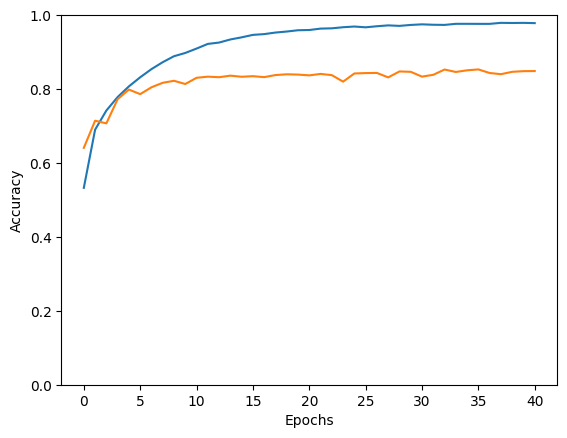

In [59]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()

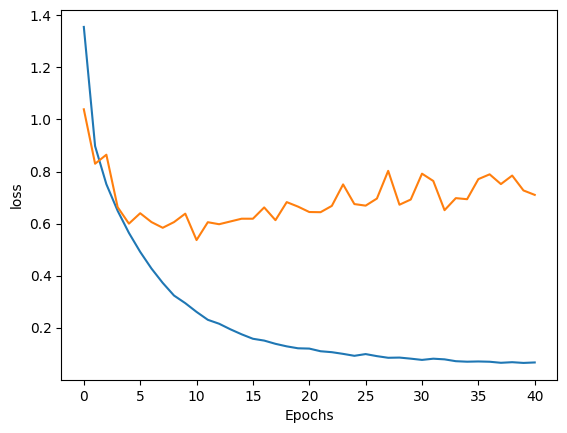

In [60]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()

In [61]:
test_loss, test_acc, test_precision, test_recall = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")

313/313 - 1s - 3ms/step - accuracy: 0.8531 - loss: 0.7709 - precision_4: 0.8626 - recall_4: 0.8469
Test Loss: 0.7709493637084961
Test Accuracy: 0.8531000018119812
Test Precision: 0.8625993132591248
Test Recall: 0.8468999862670898


 85/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

W0000 00:00:1723818570.115998     815 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


W0000 00:00:1723818571.164468     812 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1469


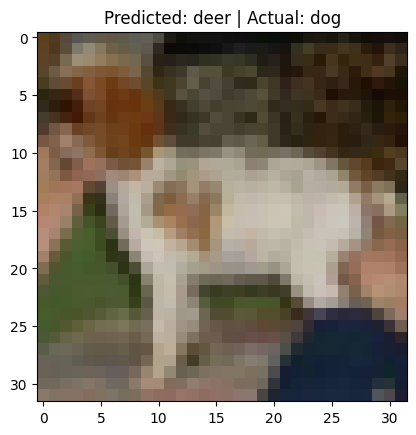

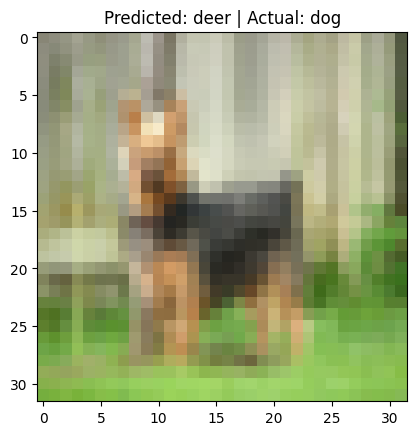

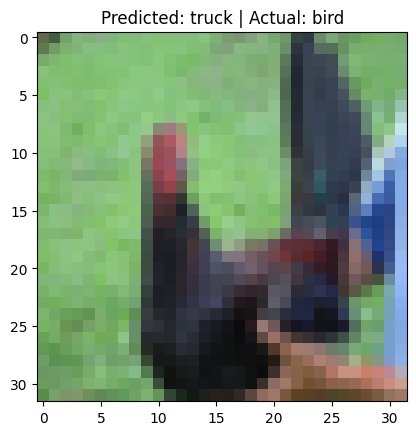

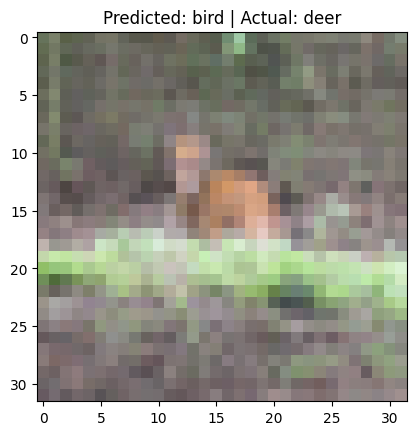

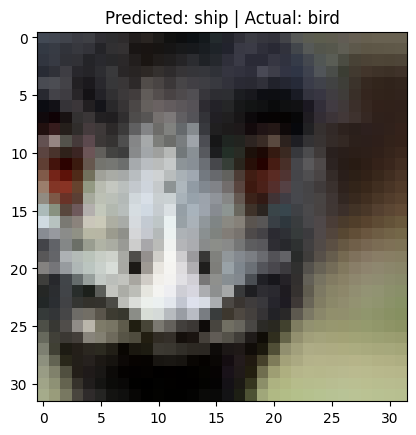

In [62]:
prediction = model.predict(X_test)
misclassified = np.where(prediction.argmax(axis=1) != y_test.argmax(axis=1))[0]
print(len(misclassified))
for i in range(5):
    plt.imshow(X_test[misclassified[i]])
    plt.title(f'Predicted: {class_name[prediction[misclassified[i]].argmax()]} | Actual: {class_name[y_test[misclassified[i]].argmax()]}')
    plt.show()